# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot(df):
    # diferenciar entre clase 0 y clase 1
    c0 = df[df['output']==0]
    c1 = df[df['output']==1]

    xs0 = [e[0] for e in c0['input']]
    ys0 = [e[1] for e in c0['input']]


    xs1 = [e[0] for e in c1['input']]
    ys1 = [e[1] for e in c1['input']]

    plt.scatter(xs0, ys0, color='limegreen', alpha=0.5)
    plt.scatter(xs1, ys1, color='red', alpha=0.5)
    return plt

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [7]:
def diagonales(n, d, C):
  mean0 = np.full(d,-1)
  mean1 = np.full(d,1)
    
  desviacion_std = C * np.sqrt(d)
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df

diagonales(1000, 2, 0.75)

,input,output
0,"[0.12201749458527322, -0.8406798212555022]",0
1,"[1.6047285902468147, -1.4032996076279636]",0
2,"[-0.8951620445861951, -0.019267170402888834]",0
3,"[-1.8717277967030508, -0.7957092685299376]",0
4,"[0.6472467087615952, -1.3224906484026222]",0
...,...,...
995,"[1.7927484910414861, 1.102473314196862]",1
996,"[-0.34231855958051716, 0.20431468919070195]",1
997,"[1.0333894727461967, 0.8542582544688389]",1
998,"[-0.2174992917444607, 2.535278932856632]",1


Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

<module 'matplotlib.pyplot' from '/home/don-berge/Documentos/IIA-TPS/TP3/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

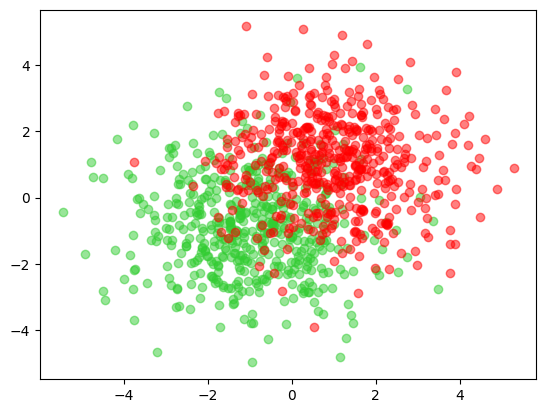

In [8]:
plot(diagonales(1000, 2, 1))

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

<module 'matplotlib.pyplot' from '/home/don-berge/Documentos/IIA-TPS/TP3/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

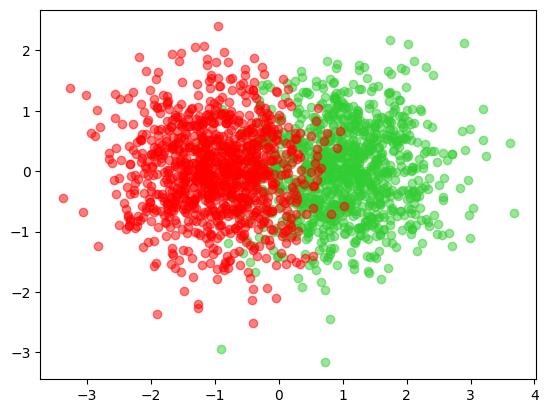

In [9]:
def paralelas(n, d, C):
  mean0 = np.zeros(d)
  mean1 = np.zeros(d)
  mean0[0] = 1
  mean1[0] = -1

  desviacion_std = C
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df

par_df = paralelas(2000, 2, 0.75)

plot(par_df) 

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

### Determinar lugar de clase 0
Son los $\rho$ que cumplen $0\leq \rho \leq 1$.

Para el $\theta$, se puede obtener que para los extremos:

$\theta = 4\pi\rho \lor \theta=4\pi\rho-\pi$
 
Por lo que se puede hacer variar un valor $a$ entre $[0,1]$ para obtener que

$\theta = 4\pi\rho-a\pi$

<module 'matplotlib.pyplot' from '/home/don-berge/Documentos/IIA-TPS/TP3/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

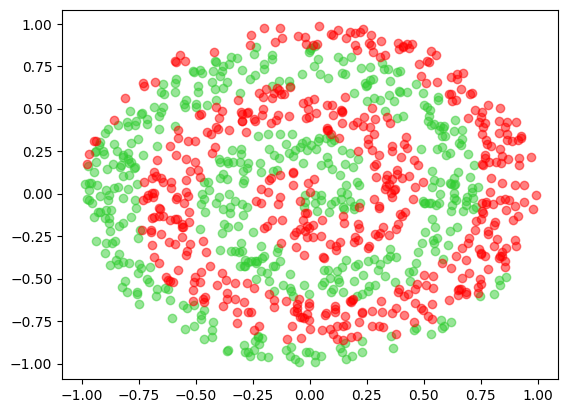

In [10]:
# Primero determino el lugar geometrico de los puntos de clase 0
# 0 <= r0 <= 1
# r0 = theta/4pi => theta = 4pi*r0
# r0 = (theta+pi)/4pi => theta = 4*pi*r0 - pi

# 4*pi*r0 - pi <= theta <= 4*pi*r0
# -pi <= theta-4*pi*r0 <= 0


# Para el caso de r1
# 0 <= r1 <= 1
# theta <= 4*pi*r1 - pi o 4*pi*r1 <= theta

# Para la primera sección
# theta <= pi*(4*r1-1)


# Para la segunda sección
# 4*pi*r1 <= theta 

#### PASO A COORDENADAS CARTESIANAS ####
# r0
# theta = 4*pi*r0 - a*pi
# r0 = (theta + a*pi)/4pi
# x = (theta + a*pi)/4pi * cos(theta)
 
def toCartesianP(r, theta):
  x = r * np.cos(theta)
  y = r * np.sin(theta)
  return (x, y)

def toCartesianA(rs, thetas):
  a = [(r * np.cos(theta), r * np.sin(theta)) for r, theta in zip(rs, thetas)]
  return a

def espirales(n):
  r0s = np.sqrt(np.random.uniform(0, 1, n//2))  
  a0s = np.random.uniform(0, 1, n//2)
  theta0s = [np.pi*(4*r-a) for r,a in zip(r0s,a0s)]

  r1s = np.sqrt(np.random.uniform(0, 1, n//2))
  a1s = np.random.uniform(-1, 0, n//2)
  theta1s = [np.pi*(4*r-a) for r,a in zip(r1s,a1s)]

  input0 = toCartesianA(r0s,theta0s)
  input1 = toCartesianA(r1s,theta1s)

  output0 = np.full(n//2, 0)
  output1 = np.full(n//2, 1)

  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0,output1]).tolist()
  })

  return df

plot(espirales(1000))


# Inicio del TP

En el TP vamos a clasificar los datos usando un arbol de decision con los siguientes parametros:


In [11]:
from sklearn.tree import DecisionTreeClassifier

Tree = lambda: DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)

**criterion**: Decide que estrategia usar para decidir en que parametros hacer un split.
El valor "entropy" utiliza el critrio de entropía y ganancia de información visto en clase.

**min_impurity_decrease**: Este valor controla si un split se realizara o no. Se realizara un nodo
en un split si la reduccion de la entropia despues de este split es mayor a este valor. Un arbol
con un *min_impurity_decrease* bajo tendera a realizar mas splits que uno con un valor alto.

**random_state**: Este valor es la semilla para el generador de numeros aleatorios y determina como se
comportara el arbol cuando se sigue un procedimiento que dependa de la aleatoriedad(como por ejemplo mezclar
una lista). Un valor fijo de 0 indica que el arbol realizara el mismo procedimiento en multiples llamadas lo
que aumenta la reproducibilidad.

**min_samples_leaf**: Controla cuantos valores tiene que haber en cada hoja del arbol luego de un split. Un valor
de 5 indica que un nodo sera candidato a un split si y solo si luego de realizarlo hay al menos 5 nodos tanto a la
izquierda como a la derecha del split.

## Ejercicio 1

Generamos 3 conjuntos de entrenamiento para nuestro arbol, correspondientes al
problema de las espirales, de diferentes longitudes; 150, 600 y 3000. 

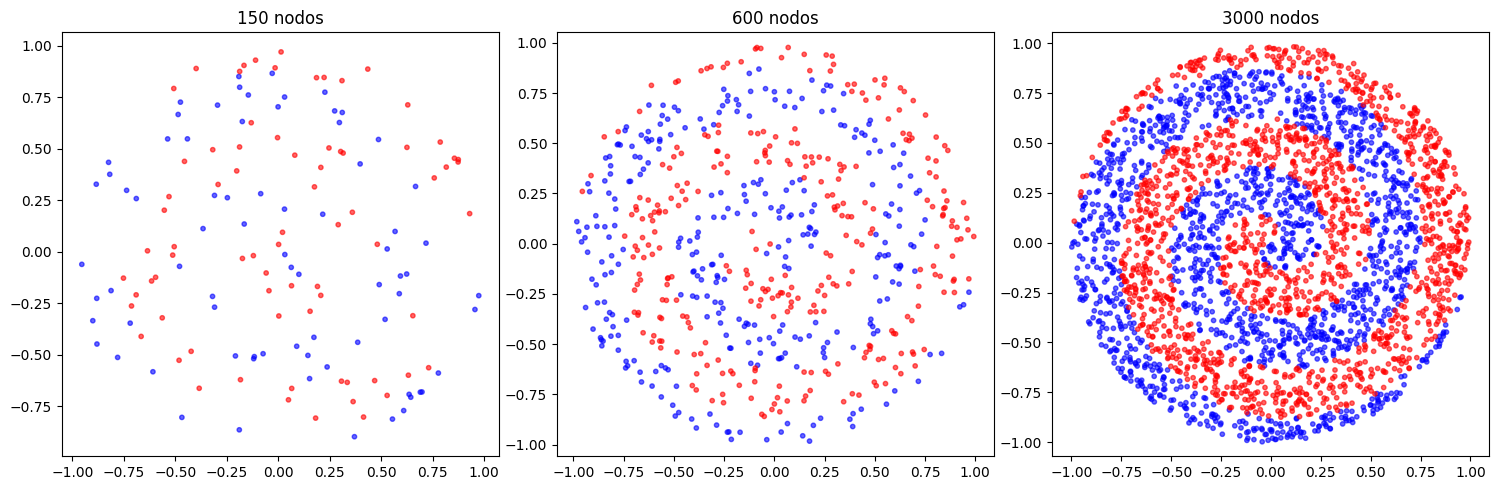

In [12]:
e1 = espirales(150)
e2 = espirales(600)
e3 = espirales(3000)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, data, title in zip(
    axs, [e1, e2, e3], ['150 nodos', '600 nodos', '3000 nodos']):

    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

Y un conjunto de prueba usando 10000 puntos de las espirales:

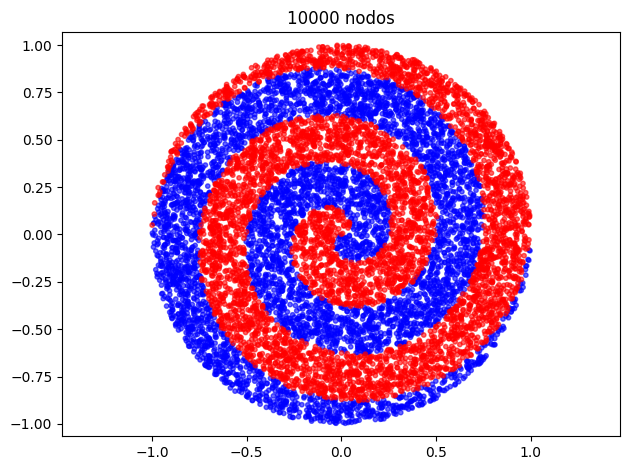

In [13]:
test = espirales(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

Entrenamos el arbol de decision a partir de cada uno de los conjunto definidos previamente. Lo cual nos genera los siguientes arboles de ejemplo.

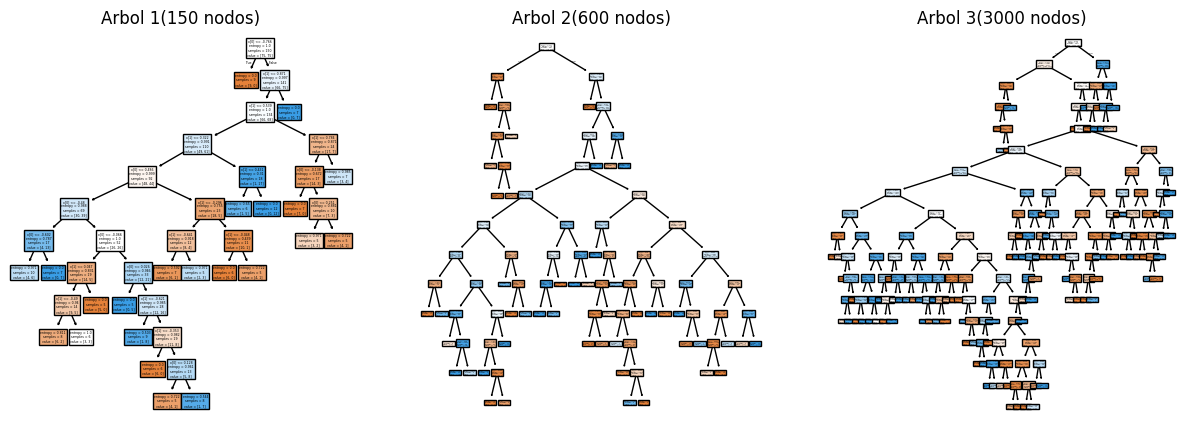

In [14]:
from sklearn import tree

t1 = Tree()
t2 = Tree()
t3 = Tree()

t1.fit(e1['input'].tolist(), e1['output'].tolist())
t2.fit(e2['input'].tolist(), e2['output'].tolist())
t3.fit(e3['input'].tolist(), e3['output'].tolist())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, t, title in zip(
    axs, [t1, t2, t3], ['Arbol 1(150 nodos)', 'Arbol 2(600 nodos)', 'Arbol 3(3000 nodos)']):

    tree.plot_tree(t, filled=True, ax=ax)

    ax.set_title(title)
    
    #ax.axis('equal')
    #ax.axis('on')

plt.show()

A medida que aumentan los puntos generados aumenta la cantidad de nodos del arbol. Esto se debe a dos razones, nuestro arbol de decision tiene un *min_impurity_decrease* muy bajo(0.02) esto hace que tienda a hacer muchos splits. Además el valor de *min_sample_leaf* hace que eventualmente el arbol deje de hacer splits para mantener la cantidad de valores en las hojas alto, lo que efectivamente reduce la altura de los arboles y hace que termine antes cuando hay menos nodos.  

Podemos ver que tan bien predicen los arboles si probamos que tan bien predicen los datos del conjunto de test.

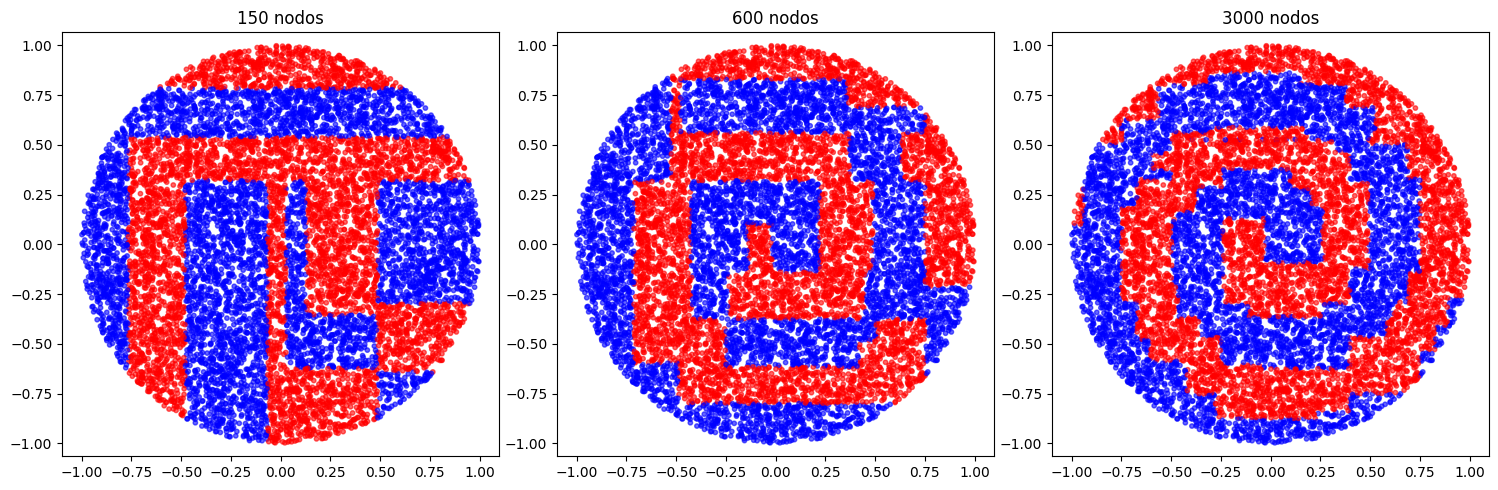

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, t, title in zip(
    axs, [t1, t2, t3], ['150 nodos', '600 nodos', '3000 nodos']):

    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

A medida que aumenta la cantidad de nodos que se usan para entrenamiento las predicciones sobre el conjunto de test son más precisas. Esto se debe a dos razones:

1. El arbol de decision que usamos hace splits siempre que puede debido a que tiene un *min_impurity_decrease* muy bajo(hace muchos splits) y un *min_sample_leaf* muy bajo(la altura del arbol de decision aumenta mucho). Por lo que el arbol hace una exploración exhaustiva del conjunto de entrenamiento.

2. A medida que agarramos mas nodos para entrenar obtenemos una muestra más significativa del conjunto de entrenamiento(porque los puntos se generan de manera uniforme). Asi que es más un probable que un arbol que predice muy bien sobre un conjunto grande prediga bien sobre el conjunto de test. 

## Ejercicio 2

Tenemos que generar 20 conjuntos de entrenamiento usando la siguiente cantidad de puntos; 125, 250, 500, 1000, 2000, 4000. Aqui hay una muestra de ejemplo para cada uno de los tamaños.

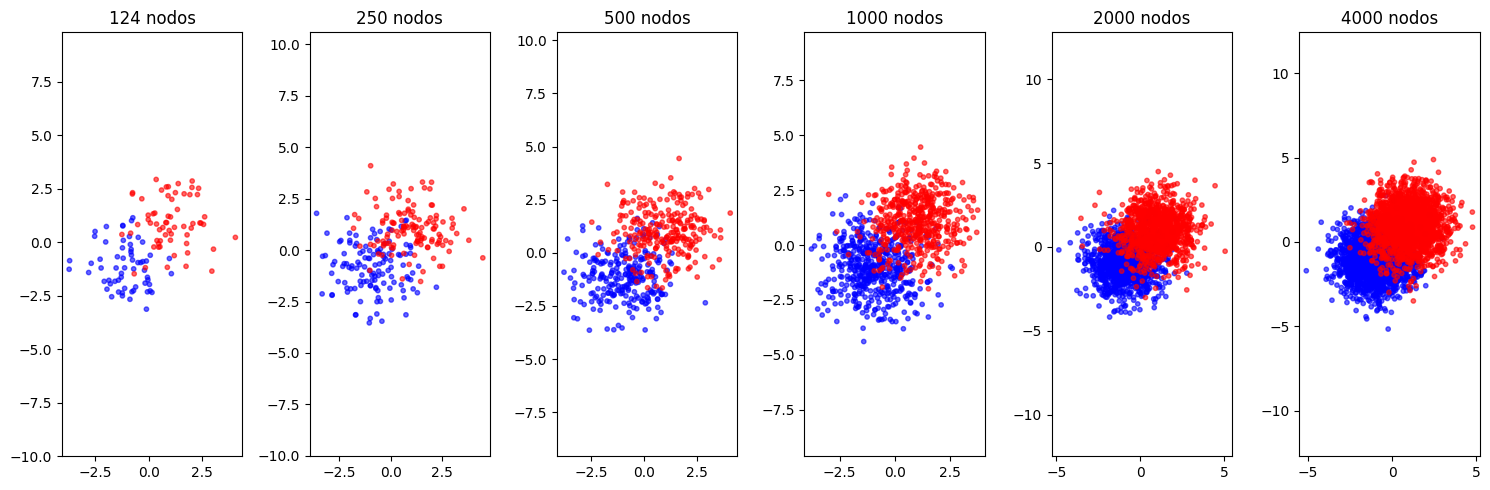

In [16]:
sizes = [125, 250, 500, 1000, 2000, 4000]

fig, axs = plt.subplots(1, 6, figsize=(15, 5))

diag = lambda n: diagonales(n, 2, 0.78)

datas = [diag(sz) for sz in sizes]

for ax, data in zip(
    axs, datas):

    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

Tambien generamos un conjunto de prueba usando 10000 nodos.

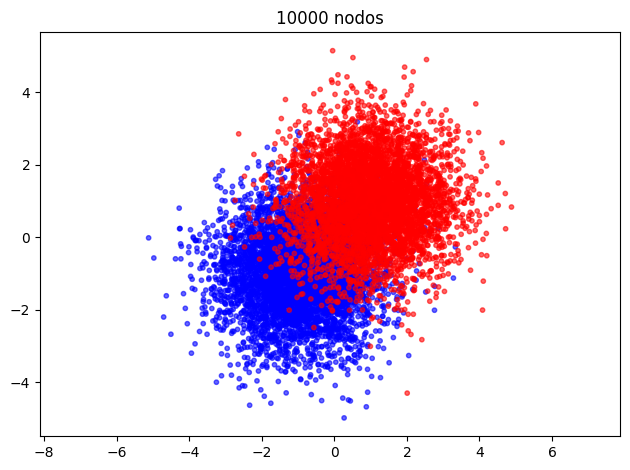

In [17]:
test = diag(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

En primer lugar generamos una grafica para ver como son las predicciones para cada punto para un arbol generado por las muestras de entrenamiento anteriores.

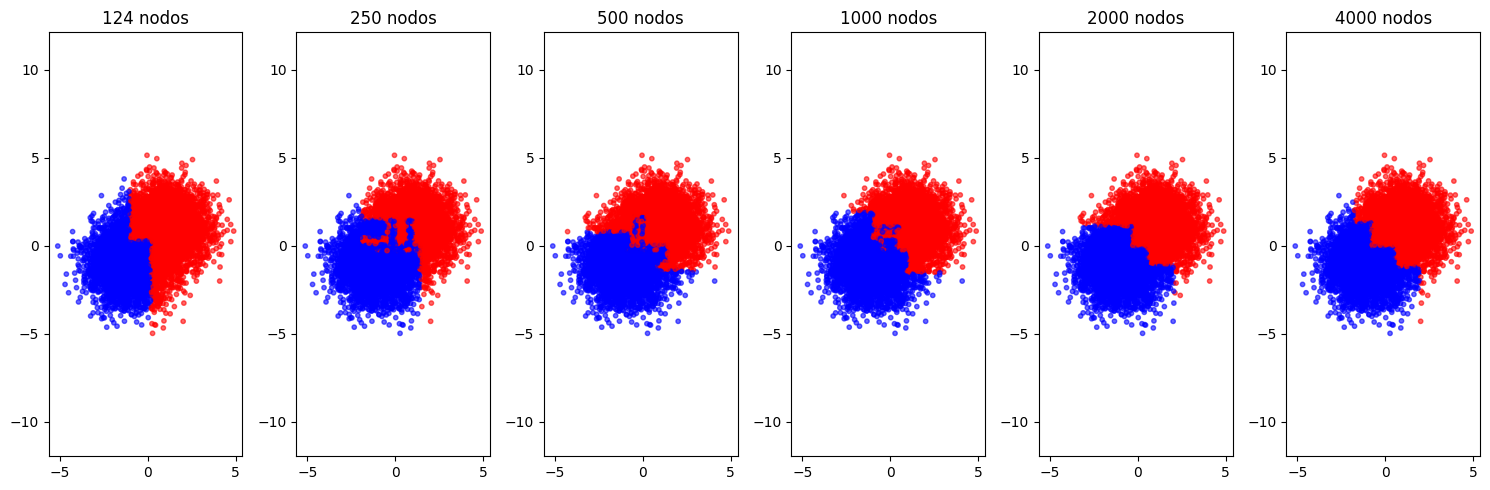

In [18]:
t = Tree()

fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for ax, data in zip(
    axs, datas):

    # Entreno el arbol con los datos
    t.fit(data['input'].tolist(), data['output'].tolist())

    # Genero la grafica
    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

A medida que se va aumentando la cantidad de nodos del arbol se va dibujando una frontera en los puntos que parece delimita la seccion donde las dos areas de puntos se cruzan, esto lo podemos comprobar graficando todos los puntos con la misma clase y usando poca transparencia. De esta manera los colores se mezclaran mejor en la intersección. Podemos ver que esta intersección se encuentra cerca del origen de coordenadas y es muy similar a una recta con pendiente descendiente.

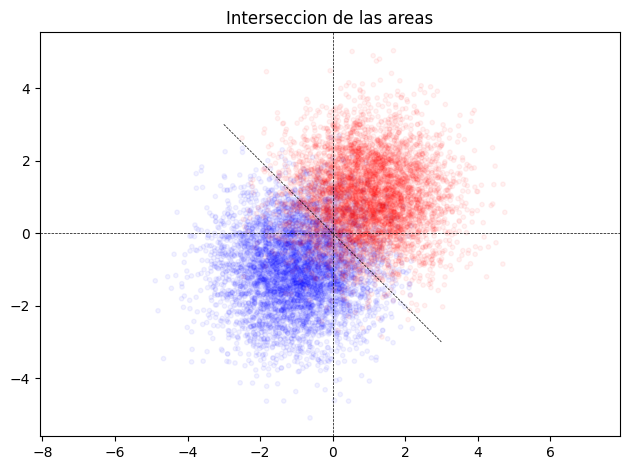

In [19]:
test = diag(10000)

x = [p[0] for p,c in zip(test['input'], test['output'])]
y = [p[1] for p,c in zip(test['input'], test['output'])]

c = test['output']

plt.scatter(x, y,c=c, cmap='bwr', alpha=0.05, s=10)
plt.title("Interseccion de las areas")

# Setear los limite de los ejes en (-3,3)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Poner el centro en (0,0)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')

# marcar la recta y=-x
plt.plot([-3, 3], [3, -3], color='black', lw=0.5, ls='--')

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

¿Porque pasa esto?. En todo momento el arbol intenta minimizar la entropía, una menor entropía indica que los elementos del conjunto estan menos mezclados y por lo tanto es más facil clasificar a los elementos del mismo como de una sola clase.

![titulo](entropia.webp)

La mejor forma de dividir los elementos de las diagonales(y por lo tanto conseguir una menor entropía) es por la linea de intersección de las normales. Por lo tanto un arbol que intenta minimizar este parametro se aproximara cada vez mas a esta linea divisora.

Algo similar ocurre si repetimos el experimento con los datos de "paralelas".

Generamos 20 conjuntos de ejemplo y un conjunto de test(con los mismos tamaños que en diagonales).

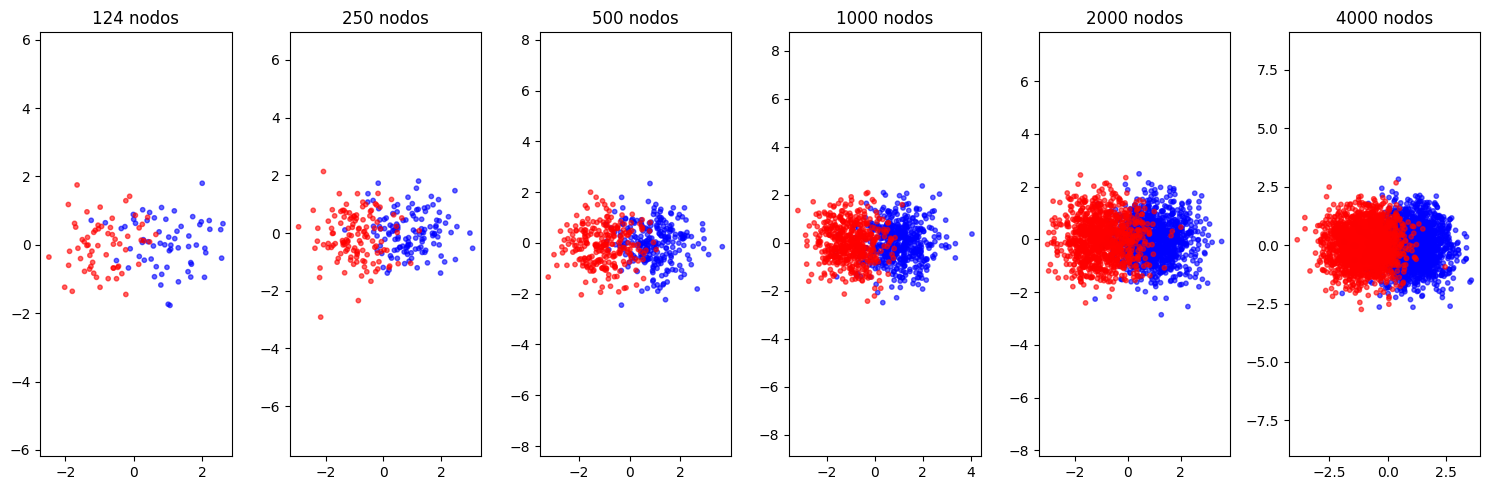

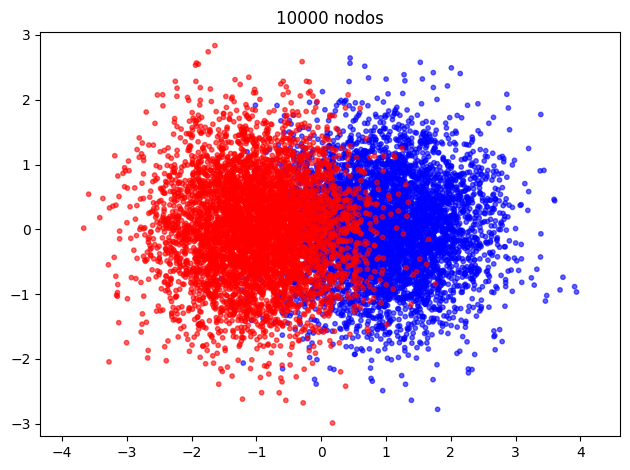

In [20]:
sizes = [125, 250, 500, 1000, 2000, 4000]

fig, axs = plt.subplots(1, 6, figsize=(15, 5))

diag = lambda n: paralelas(n, 2, 0.78)

datas = [diag(sz) for sz in sizes]

for ax, data in zip(
    axs, datas):

    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

# Conjunto de test

test = diag(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

Ahora entrenamos un arbol con los conjuntos de ejemplo:

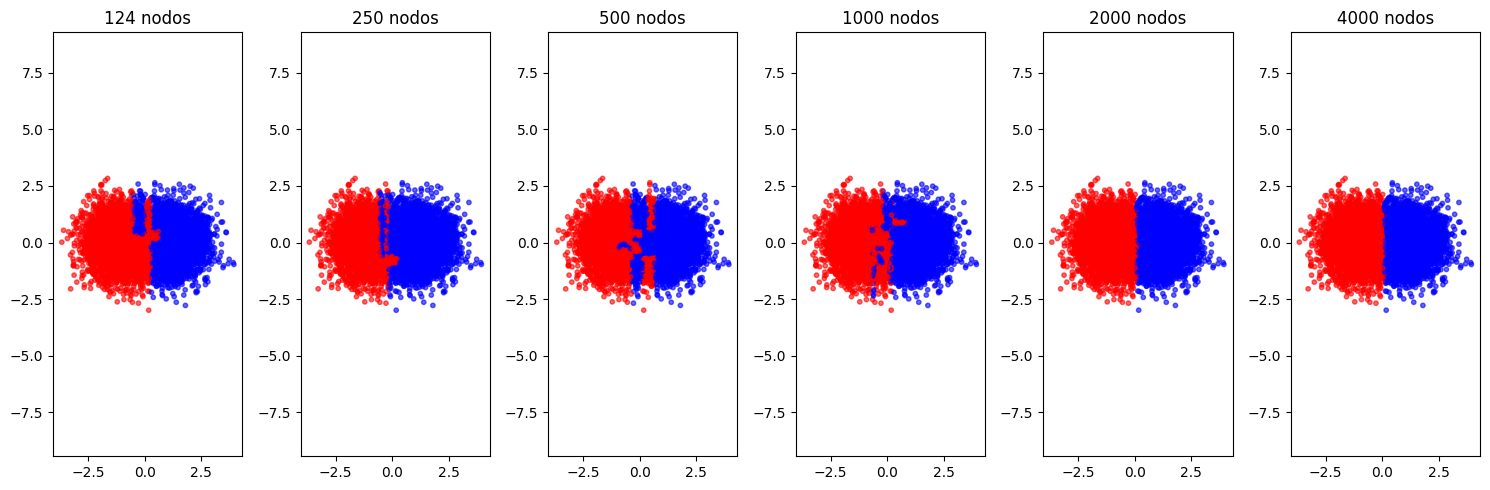

In [21]:
t = Tree()

fig, axs = plt.subplots(1, 6, figsize=(15, 5))

for ax, data in zip(
    axs, datas):

    # Entreno el arbol con los datos
    t.fit(data['input'].tolist(), data['output'].tolist())

    # Genero la grafica
    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

En este caso la linea divisora que minimiza la entropía es la linea que vertical que pasa por el origen de coordenadas, esto lo podemos ver si graficamos los datos con menor transparencia.

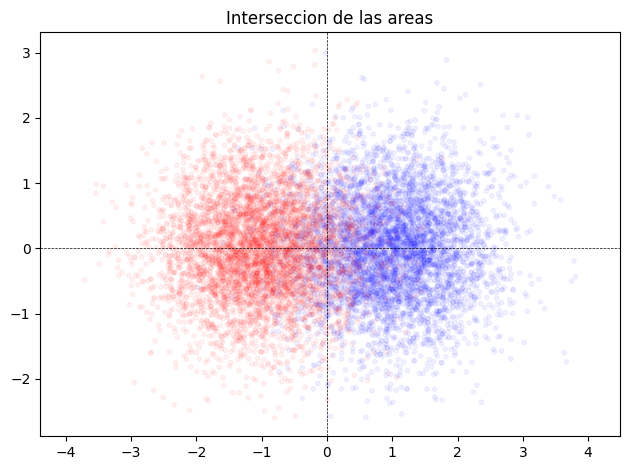

In [22]:
test = diag(10000)

x = [p[0] for p,c in zip(test['input'], test['output'])]
y = [p[1] for p,c in zip(test['input'], test['output'])]

c = test['output']

plt.scatter(x, y,c=c, cmap='bwr', alpha=0.05, s=10)
plt.title("Interseccion de las areas")

# Setear los limite de los ejes en (-3,3)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Poner el centro en (0,0)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

---

Ahora vamos a ver la información del error en los datos de entrenamiento(train error), el error en los datos de test(test error) y la cantidad de nodos del arbol tanto para las paralelas como para las diagonales.

In [26]:
from sklearn.metrics import accuracy_score
import time

t = Tree()
sizes = [125, 250, 500, 1000, 2000, 4000]

diag = lambda n: diagonales(n, 2, 0.78)
par = lambda n: paralelas(n, 2, 0.78)

def makeDF(fun):
    # Conjunto de test
    test = fun(10000)

    df = pd.DataFrame({
        "125 nodos": {},
        "250 nodos": {},
        "500 nodos": {},
        "1000 nodos": {},
        "2000 nodos": {},
        "4000 nodos": {},
    })

    CANT_SETS = 20

    for sz in sizes:
        train_error = []
        test_error = []
        node_sizes = []
        label = f"{sz} nodos"
        for i in range(CANT_SETS):
            # Genero los datos
            data = fun(sz)

            # Entreno el arbol con los datos
            t.fit(data['input'].tolist(), data['output'].tolist())

            # Calculo el error de entrenamiento
            pred_train = t.predict(data['input'].tolist())
            pred_test = t.predict(test['input'].tolist())

            train_error.append(1 - accuracy_score(data['output'], pred_train))
            test_error.append(1 - accuracy_score(test['output'], pred_test))
            node_sizes.append(t.tree_.node_count)

            # Espero un tiempo para mejorar la generacion de numeros aleatorios
            time.sleep(0.1)
    
        df[label] = {
            "train_error": train_error,
            "test_error": test_error,
            "node_sizes": node_sizes,
        }

    return df

df_diag = makeDF(diag)
df_par = makeDF(par)

from IPython.display import display

print("Diagonales")
display(df_diag)
print("Paralelas")
display(df_par)

Diagonales


,125 nodos,250 nodos,500 nodos,1000 nodos,2000 nodos,4000 nodos
train_error,"[0.06451612903225812, 0.056451612903225756, 0....","[0.07199999999999995, 0.06399999999999995, 0.0...","[0.06000000000000005, 0.07199999999999995, 0.0...","[0.07899999999999996, 0.08899999999999997, 0.0...","[0.08950000000000002, 0.08199999999999996, 0.0...","[0.09850000000000003, 0.09075, 0.0939999999999..."
test_error,"[0.12350000000000005, 0.127, 0.147700000000000...","[0.11160000000000003, 0.137, 0.125299999999999...","[0.12219999999999998, 0.14190000000000003, 0.1...","[0.11929999999999996, 0.11560000000000004, 0.1...","[0.10319999999999996, 0.11150000000000004, 0.1...","[0.10509999999999997, 0.10309999999999997, 0.1..."
node_sizes,"[17, 19, 19, 19, 19, 15, 21, 21, 19, 17, 17, 2...","[35, 31, 35, 39, 31, 23, 25, 33, 31, 31, 33, 3...","[43, 75, 65, 51, 57, 57, 53, 57, 55, 57, 69, 5...","[89, 47, 69, 91, 65, 87, 65, 73, 89, 67, 57, 5...","[49, 49, 59, 37, 51, 55, 53, 47, 39, 55, 43, 4...","[47, 35, 37, 37, 43, 43, 39, 43, 41, 47, 37, 3..."


Paralelas


,125 nodos,250 nodos,500 nodos,1000 nodos,2000 nodos,4000 nodos
train_error,"[0.048387096774193505, 0.06451612903225812, 0....","[0.05600000000000005, 0.07599999999999996, 0.0...","[0.06399999999999995, 0.05800000000000005, 0.0...","[0.06899999999999995, 0.08599999999999997, 0.0...","[0.07999999999999996, 0.10050000000000003, 0.0...","[0.10175000000000001, 0.10375000000000001, 0.0..."
test_error,"[0.11619999999999997, 0.12780000000000002, 0.1...","[0.14100000000000001, 0.10860000000000003, 0.1...","[0.11929999999999996, 0.11580000000000001, 0.1...","[0.12219999999999998, 0.10699999999999998, 0.1...","[0.10950000000000004, 0.10360000000000003, 0.1...","[0.10850000000000004, 0.10199999999999998, 0.1..."
node_sizes,"[17, 15, 15, 15, 15, 17, 15, 15, 19, 13, 15, 1...","[29, 39, 27, 35, 33, 33, 23, 35, 37, 33, 31, 2...","[47, 51, 59, 57, 49, 49, 55, 51, 49, 63, 59, 6...","[55, 51, 55, 47, 79, 49, 61, 57, 71, 57, 37, 7...","[49, 33, 25, 25, 23, 35, 25, 23, 31, 31, 27, 1...","[15, 19, 15, 17, 15, 15, 15, 19, 17, 15, 13, 1..."


A partir de estos datos, generamos la grafica del error de entrenamiento medio, error de test medio y tamaño medio del arbol.

[]

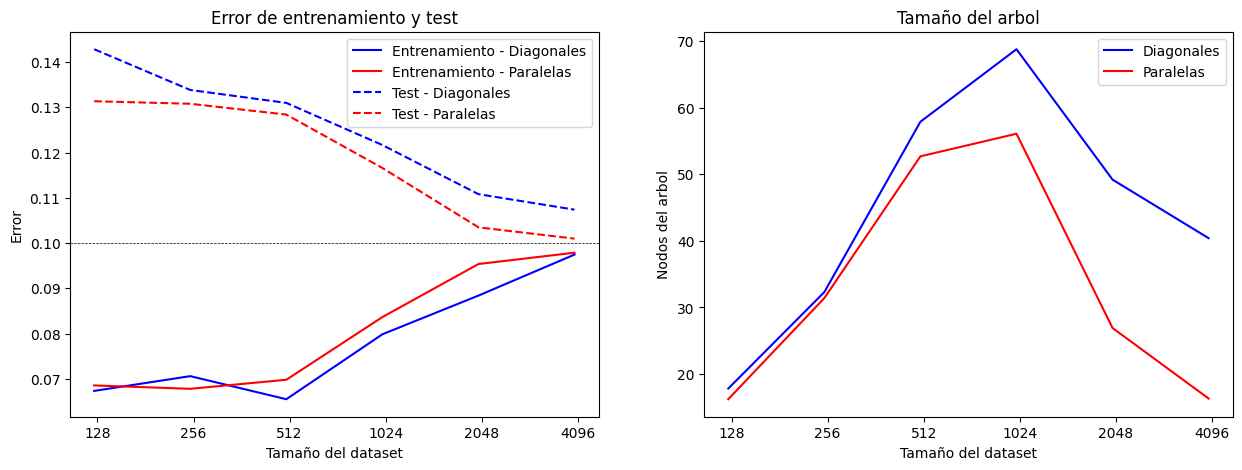

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.ticker as mticker


labels = list(df_diag.columns)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# ax[0] es la grafica del error y ax[1] es la grafica de los nodos

# Accedo a las columnas del dataframe
def getMean(df, col):
    return [np.mean(df[label][col]) for label in labels]

# Grafico de linea sizes vs train_error_mean, usar escala logaritmica en base 2 el eje x
# Muestro los numeros sin notacion cientifica
# Configurar el eje x para que no use notación científica
axs[0].set_xscale('log', base=2)
axs[0].plot(sizes, getMean(df_diag, "train_error"), label='Entrenamiento - Diagonales', color='blue')
axs[0].plot(sizes, getMean(df_par, "train_error"), label='Entrenamiento - Paralelas', color='red')
axs[0].plot(sizes, getMean(df_diag, "test_error"), label='Test - Diagonales', color='blue', ls='--')
axs[0].plot(sizes, getMean(df_par, "test_error"), label='Test - Paralelas', color='red', ls='--')
axs[0].set_title("Error de entrenamiento y test")
axs[0].set_xlabel("Tamaño del dataset")
axs[0].set_ylabel("Error")
axs[0].legend()
axs[0].xaxis.set_major_formatter(mticker.ScalarFormatter())

# Grafico una linea horizontal en y = 0.10
axs[0].axhline(y=0.10, color='black', lw=0.5, ls='--')

axs[1].set_xscale('log', base=2)
axs[1].plot(sizes, getMean(df_diag, "node_sizes"), label='Diagonales', color='blue')
axs[1].plot(sizes, getMean(df_par, "node_sizes"), label='Paralelas', color='red')
axs[1].set_title("Tamaño del arbol")
axs[1].set_xlabel("Tamaño del dataset")
axs[1].set_ylabel("Nodos del arbol")
axs[1].legend()
axs[1].xaxis.set_major_formatter(mticker.ScalarFormatter())




# Grafico de linea sizes vs node_sizes_mean, usar escala logaritmica en base 2 el eje x
#axs[1].set_xscale('log', base=2)
#axs[1].plot(sizes, node_sizes_mean, label='node sizes', color='green')
#axs[1].set_title("Tamaño del arbol")
#axs[1].set_xlabel("Tamaño del dataset")
#axs[1].set_ylabel("Tamaño del arbol")
#axs[1].legend()

plt.plot()

Tanto el error de entrenamiento como el error de test parecen converger a 0.10.

### Explicacion

Cuando trabaja con datos continuos en un intervalo $[a,b]$, el arbol de decisión realiza splits buscando un punto $m$
donde partir el rango de manera que del lado izquierdo quedan todos los valores $x\leq m$ y del lado derecho $x>m$, siempre
intentando minimizar la entropía en cada split. Entonces llegar a la hoja de un arbol para un valor $(x,y)$ es equivalente a ejecutar
las condiciones $x\leq m_1$, $y>m2$, $x>m_3$, $y\leq m_4, \dots$, donde $m_1, m_2, m_3, m_4, \dots$ son puntos de splits elegidos durante
la construción del arbol. El resultado final es que el punto $(x,y)$ queda encasillado en una cuadricula del plano $xy$ determinada por las
condiciones ejecutadas.

Cada cuadricula sera dominada por el color más predominante en la misma, las fronteras de los cuadrados de distinto color aproximan a una curva
que efectivamente divide los puntos equitativamente.

Un buen candidato para la curva que divide los puntos tanto en las diagonales como en las paralelas es en la zona donde se intersecan las zonas,
ya que como se generan con una distribución normal, los puntos se concentran mas en los centros y escasean en los bordes.

La función de densidad de probabilidad de una distribución normal multivariada $N$ se define como:
$$f_N(\mathbf{x})=\dfrac{\exp\left(-1/2\cdot (\mathbf{x}-\mu)^T \cdot \Sigma^{-1} \cdot (\mathbf{x}-\mu)\right)}{\sqrt{(2\pi)^k|\Sigma|}}$$

Donde $\mathbf x$ es un vector real de $n$ dimensiones, $\Sigma$ es una matriz de covarianza(la cual tiene que ser definida positiva) y $\mu$ es el centro de la distribución.

La curva interseción de dos distribuciones normales multivariadas $N_1$ y $N_2$ viene determinada por aquellos puntos que cumplen que:

$$f_{N_1}(\mathbf x) = f_{N_2}(\mathbf x)$$


Esa curva parece dificil de determinar pero afortunadamente tanto en el caso de las diagonales como en las paralelas se cumple que $\Sigma$ es una matriz diagonal definida positiva.
Por lo que se puede razonar algebraicamente para llegar a esta expresión:

$$f_{N_1}(\mathbf x) = f_{N_2}(\mathbf x) \iff |\mathbf{x}-\mu_1|^2 = |\mathbf{x}-\mu_2|^2$$

Para el caso de las diagonales, la formula se reduce a:

$$
(x-1)^2 + (y-1)^2 = (x+1)^2 + (y+1)^2
\iff

y=-x
$$

Mientras que para las paralelas, la formula equivale a:

$$
(x-1)^2 + y^2 = (x+1)^2 + y^2
\iff

x=0
$$

Lo cual se condice con lo observado en las graficas:


#### Explicación de los errores

En la grafica de train error vs test error se observo que el error converge a un valor similar a 0.10, este valor no es casualidad y viene
del hecho de que los puntos se generan con una distribución normal multivariada.

Los puntos $(X,Y)$ del plano se generan con una distribución normal bivariada.

Las diagonales se generan con matriz de covarianza:

$$\Sigma = \begin{pmatrix}
    C^2 \cdot 2 & 0 \\
    0 & C^2 \cdot 2
\end{pmatrix}$$

Mientras que en las paralelas la matriz de covarianza es:

$$\Sigma = \begin{pmatrix}
    C^2 & 0 \\
    0 & C^2
\end{pmatrix}$$

Un teorema que se cumple para la distribución normal multivariada es que la no correlación implica independencia,
en este caso la covarianza entre $X$ e $Y$ es 0 por lo que ambas se pueden ver como variables aleatorias normales
e independientes.

Dijimos que la mejor forma de clasificar los puntos es por la intersección de los puntos, el clasificador ideal
que utiliza esta idea se define asi:

$$\operatorname{Clase}(x,y) = \begin{cases}
    0 & \text{si } x\leq 0 \\
    1 & \text{si } x>0
\end{cases}$$

Con este clasificador, ¿Cual es la probabilidad de equivocarnos?:

Los puntos de clase $0$ se generan con centro en $(-1,0)$. Esto quiere decir que $X_0 \sim \mathcal{N}(-1,C)$,
mientras que la clase 1 se genera con centro en $(1,0)$, por lo que $X_1 \sim \mathcal{N}(1,C)$.

Este clasificador clasifica mal un punto de clase 0 cuando $X_0> 0$, la propiedad de este suceso puede calcularse
con una tabla de distribuciones normales.

$P(X_0> 0) = 0.0999$.

El clasificador clasifica mal un punto de clase 1 cuando $X_1 \leq 0$, con una tabla de distribuciones normales se puede
calcular que:

$P(X_1< 0) = 0.0999$

Entonces dados 5000 puntos de clase 0, y 5000 puntos de clase 1 la probabilidad de equivocarse es:

$\dfrac{P(X_0>0)*5000 + P(X_1<0)*5000}{10000} = 0.0999 \sim 0.010$

Lo cual se condice con lo observado en las grafica.

Para el caso de las diagonales se puede seguir un razonamiento similar(aunque es
un poco mas complicado):

Clasificamos los puntos como:

$$\operatorname{Clase}(x,y) = \begin{cases}
    0 & \text{si } y\leq -x \\
    1 & \text{si } y > -x
\end{cases}$$

$X_0, Y_0 \sim \mathcal{N}(-1,C\sqrt 2)$
$X_1, Y_1 \sim \mathcal{N}(1,C\sqrt 2)$

La probabilidad de equivocarse si un punto es de clase 0 es:

$P(Y_0> -X_0) = P(X_0+Y_0> 0)$

$X_0+Y_0\sim \mathcal{N}(-2, 2\cdot C)$(la suma de dos variables normales es normal, las medias se suman y las varianzas tambien).

Por tabla se tiene que:

$P(X_0+Y_0 > 0) = 0.0999$

De la misma forma, si un punto es de clase 1, la probabilidad de fallar es:

$P(Y_1 \leq -X_1) = P(X_1+Y_1 \leq 0)$

$X_1+Y_1\sim \mathcal{N}(2, 2\cdot C)$(de nuevo por suma de normales).

Por tabla:

$P(X_1+Y_1 \leq 0) = 0.0999$

Entonces en $10000$ clasificaciones, donde la mitad son de clase 0 y la otra mitad de clase 1
la probabilidad de fallar es:

$\dfrac{P(X_0>0)*5000 + P(X_1<0)*5000}{10000} = 0.0999 \sim 0.010$

Lo cual se condice con lo observado en la grafica.

#### Explicación tamaño del arbol

El tamaño del arbol aumenta a medida que se aumenta el tamaño del test de entrenamiento pero decae abruptamente cuando se pasa el limite
de los 1000 nodos. Esto se debe a que a partir de los 1000 nodos, la intersección de las zonas de puntos es más marcada y por ende el arbol
la identifica más rapido(esto puede observarse en las graficas de las muestras).

----

### Ejercicio 3

---

# Ejercicio 2

In [25]:
#from matplotlib import plt
TRAIN_SETS = 20
ns = [125, 250, 500, 1000, 2000, 4000]

def fun(gen):
    errors = []
    error_tests = []
    tree_size = []
    acertados = []
    otros = []

    for n in ns:
        error = []
        error_test = []
        sz = 0

        for i in range(TRAIN_SETS):
            e = gen(n, 2, 0.78)
            X_train = e['input'].tolist()
            Y_train = e['output'].tolist()

            clf.fit(X_train, Y_train)

            if(i == TRAIN_SETS-1):
                clase0 = len([c for c in clf.predict(X_test) if c == 0])
                acertados.append(clase0)
                otros.append(len(X_test) - clase0)
            
            scr = clf.score(X_train, Y_train)

            error.append(1-scr)
            error_test.append(1-clf.score(X_test, Y_test))
            sz += clf.tree_.node_count
            
        errors.append(np.mean(error))
        error_tests.append(np.mean(error_test))
        tree_size.append(sz/TRAIN_SETS)


    _, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].semilogy(ns, acertados, label='Clase 0')
    axs[0].semilogy(ns, otros, label='Clase 1')
    axs[0].legend()
    axs[0].set_title('Ejemplares bien clasificados')
    axs[0].set_xlabel('n')
    axs[0].set_ylabel('Cantidad')

    axs[1].plot(ns, errors, label='Error Train')
    axs[1].plot(ns, error_tests, label='Error Test')
    axs[1].legend()
    axs[1].set_title('Errores de entrenamiento y test')
    axs[1].set_xlabel('n')
    axs[1].set_ylabel('Error')

    axs[2].plot(ns, tree_size, label='Tamaño del árbol')
    axs[2].legend()
    axs[2].set_title('Tamaño del árbol')
    axs[2].set_xlabel('n')
    axs[2].set_ylabel('Tamaño')

    plt.tight_layout()
    plt.show()

fun(paralelas)
fun(diagonales)



NameError: name 'clf' is not defined

En base a los resultado obtenidos se ...

# Ejercicio 3

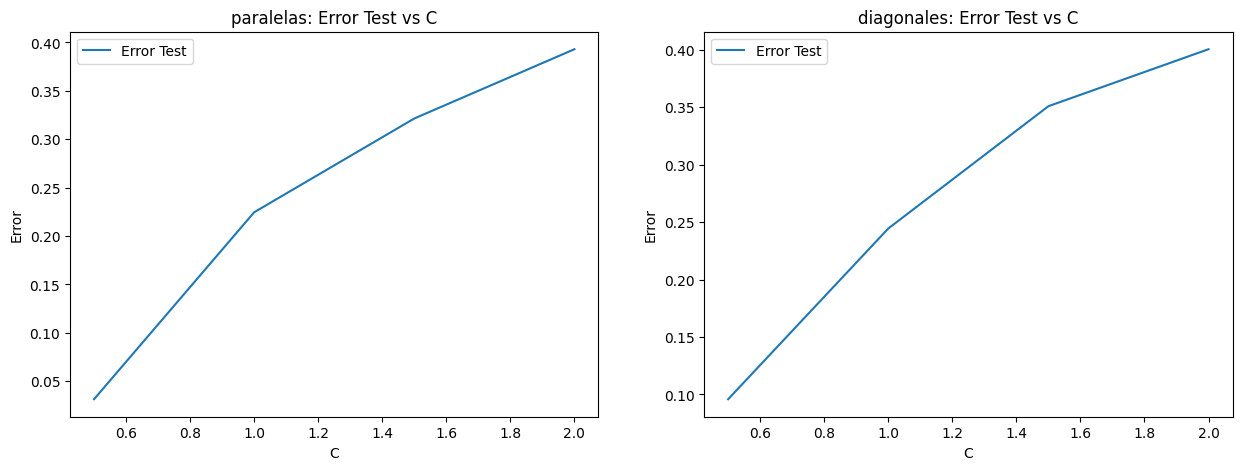

In [ ]:
d = 5
n = 250

Cs = [i/2 for i in range(1, 5, 1)]

def ruido():
    j = 0
    _, axs = plt.subplots(1, 2, figsize=(15, 5))
    for gen in [paralelas, diagonales]:
        test_error = []

        for c in Cs:
            test = gen(10000, d, c)

            X_test = test['input'].tolist()
            Y_test = test['output'].tolist()

            error = []
            TRAIN_SETS = 20

            for i in range(TRAIN_SETS):
                e = gen(n, d, c)
                X_train = e['input'].tolist()
                Y_train = e['output'].tolist()

                clf.fit(X_train, Y_train)

                scr = clf.score(X_test, Y_test)

                error.append(1-scr)

            test_error.append(np.mean(error))


        axs[j].plot(Cs, test_error, label='Error Test')
        axs[j].legend()
        axs[j].set_title(gen.__name__ + ': ' + 'Error Test vs C')
        axs[j].set_xlabel('C')
        axs[j].set_ylabel('Error')

        j += 1
    plt.show()

ruido()

???

# Ejercicio 4

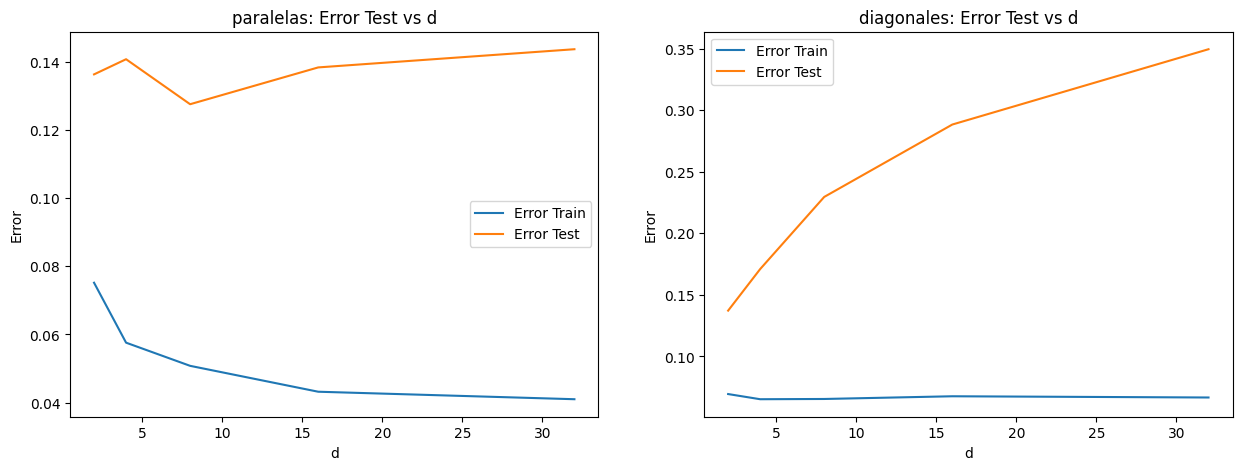

In [ ]:
C = 0.78
n = 250
ds = [2**i for i in range(1,6)]

def dimensionalidad():
    j = 0
    _, axs = plt.subplots(1, 2, figsize=(15, 5))
    for gen in [paralelas, diagonales]:
        error_train = []
        error_tests = []  

        for d in ds:
            TRAIN_SETS = 20
            errortr = []
            errorts = []

            test = gen(10000, d, C)

            X_test = test['input'].tolist()
            Y_test = test['output'].tolist()

            for i in range(TRAIN_SETS):
                e = gen(n, d, C)
                X_train = e['input'].tolist()
                Y_train = e['output'].tolist()

                clf.fit(X_train, Y_train)

                scr = clf.score(X_train, Y_train)

                errortr.append(1-scr)
                errorts.append(1-clf.score(X_test, Y_test))

            error_train.append(np.mean(errortr))
            error_tests.append(np.mean(errorts))

        axs[j].plot(ds, error_train, label='Error Train')
        axs[j].plot(ds, error_tests, label='Error Test')
        axs[j].legend()
        axs[j].set_title(gen.__name__ + ': ' + 'Error Test vs d')
        axs[j].set_xlabel('d')
        axs[j].set_ylabel('Error')

        j += 1
    plt.show()

dimensionalidad()


En base a los resultado obtenidos se pude observar que en el caso de las diagonales el error del test aumenta conforme aumenta el d, mientras que en las paralelas este aumento no es tan brusco. Ademas, que el error del train en las paralelas disminuye y en las diagonales se mantiene prácticamente igual.

Eso se puede deber a que a pesar de que ambas se calculan a partir de una distribución normal, los centros son distintos. (???)

# Ejercicio 5

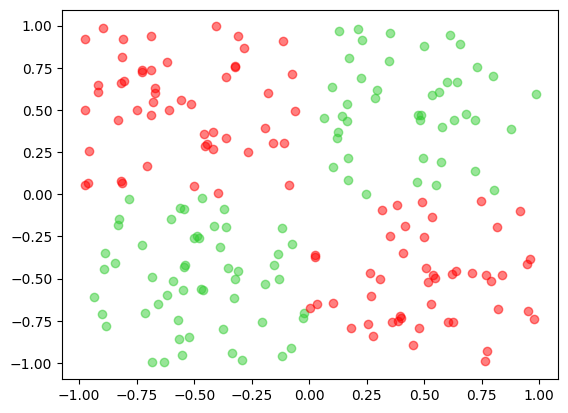

Train score:  0.5838926174496645
Test score:  0.48


[Text(0.4, 0.8333333333333334, 'x[0] <= -0.909\nentropy = 1.0\nsamples = 149\nvalue = [74.0, 75.0]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 0.81\nentropy = 0.999\nsamples = 143\nvalue = [74, 69]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.994\nsamples = 134\nvalue = [73, 61]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.503\nsamples = 9\nvalue = [1, 8]')]

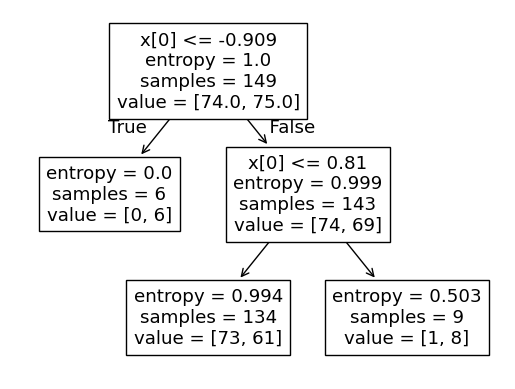

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# cargo el archivo xor.csv
# El archivo tiene dos columnas con floats y una columna con 0s y 1s
df = pd.read_csv('xor.csv')

# Accedo a la tercera columna
X = df.iloc[:, :2]
Y = df.iloc[:, 2].values

# Obtengo la primera columna como un array de numeros
A = X.iloc[:, 0].values
B = X.iloc[:, 1].values

puntos = list(zip(A, B, Y))

X1 = [x for x,_,c in puntos if c == 0]
X2 = [x for x,_,c in puntos if c == 1]
Y1 = [y for _,y,c in puntos if c == 0]
Y2 = [y for _,y,c in puntos if c == 1]

plt.scatter(X1, Y1, color='limegreen', alpha=0.5)
plt.scatter(X2, Y2, color='red', alpha=0.5)

plt.show()

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

coords = [[x,y] for x,y,_ in puntos]
clases = [c for _,_,c in puntos]

X_train, X_test, Y_train, Y_test = train_test_split(coords, clases, random_state=0)

clf.fit(X_train, Y_train)

tree.plot_tree(clf)


Al usar:
DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

Lo que se obtiene un árbol donde
Train score:  0.5838926174496645
Test score:  0.48

Este bajo score de puede deber a que al momento de crear el árbol se esta usando una "impureza minimal" del 0.03 haciendo que se restringan las cantidad de divisiones que puede realizarse por nodo. 

Lo que haría que haya overfittng